In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        # Get the first column (start)
        df[column_name] = natalitydata[0].str.get(start-1)
        # Get the remaining columns
        for i in range(1, stop-start + 1):
            df[column_name]=  df[column_name].str.cat(natalitydata[0].str.get(start-1+i))
    return df
    for start, stop, column_name in datadictionary:
        pd[column_name] = pd.to_numeric(pd[column_name])

In [4]:
# https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm 
# This notebook uses Nat1988.txt which is about 810 Mb.
# https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat1988.zip 

# Read the large (215 x 3.9million cells) data file into a pandas frame 
n1988 = pd.read_csv("~/Downloads/birth/NATL1988.txt", header=None)

In [5]:
# Load in a file of three columns into a list of lists, the first two elements of which are integers.
# This is our table of column positions and column names
key1988 = []
for line in open("KEY1988.txt"):
    fields = line.strip().split()
    key1988.append([int(fields[0]), int(fields[1]), fields[2]])
key1988
# I really thought vaginal/caesarian birth "mode of delivery" would be in here but I can't find it in 1988.

[[12, 12, 'RESIDENTSTATUS'],
 [13, 14, 'STATEOFRESIDENCE'],
 [21, 21, 'POPULATIONSIZECITY'],
 [35, 35, 'SEX'],
 [36, 36, 'ATTENDANTTYPE'],
 [37, 37, 'RACEOFFATHER'],
 [38, 38, 'RACEOFMOTHER'],
 [39, 39, 'RACEOFCHILD'],
 [40, 40, 'RACEOFCHILDRECODE3'],
 [41, 42, 'AGEOFMOTHER'],
 [60, 60, 'BIRTHORDERRECODE9'],
 [69, 70, 'AGEOFFATHER'],
 [77, 78, 'BIRTHWEIGHTRECODE12'],
 [80, 80, 'PLACEOFDELIVERY'],
 [81, 81, 'PLURALITY'],
 [84, 85, 'MONTH'],
 [86, 87, 'DAY'],
 [93, 94, 'DETAILGESTATIONAGE'],
 [98, 99, 'MOTHERSEDUCATION'],
 [103, 104, 'FATHERSEDUCATION'],
 [107, 107, 'DETAILMARITALSTATUS'],
 [181, 182, 'ONEMINUTEAPGAR'],
 [184, 185, 'FIVEMINUTEAPGAR'],
 [187, 188, 'HISPANICMOTHER'],
 [189, 190, 'HISPANICFATHER']]

In [48]:
n1988 = pd.read_csv("~/Downloads/birth/NATL1988.txt", header=None)

In [9]:
df = parse_natality(n1988, key1988)
df.head()

,RESIDENTSTATUS,STATEOFRESIDENCE,POPULATIONSIZECITY,SEX,ATTENDANTTYPE,RACEOFFATHER,RACEOFMOTHER,RACEOFCHILD,RACEOFCHILDRECODE3,AGEOFMOTHER,...,MONTH,DAY,DETAILGESTATIONAGE,MOTHERSEDUCATION,FATHERSEDUCATION,DETAILMARITALSTATUS,ONEMINUTEAPGAR,FIVEMINUTEAPGAR,HISPANICMOTHER,HISPANICFATHER
0,1,01,9,2,1,1,1,1,1,23,...,01,08,42,12,11,1,09,10,00,00
1,1,01,9,2,1,9,2,2,3,16,...,01,01,39,10,99,2,08,09,00,99
2,1,01,9,2,1,2,2,2,3,24,...,01,07,39,12,10,1,07,08,00,00
3,1,01,9,1,1,9,2,2,3,24,...,01,06,42,11,99,2,09,09,00,99
4,1,01,9,2,1,9,2,2,3,26,...,01,01,35,12,99,2,08,09,00,99


In [8]:
df["ONEMINUTEAPGAR"].value_counts()

09    1225724
08    1179788
99     926902
07     284030
06     102709
05      57629
04      36892
10      32464
03      25401
01      19762
02      19665
00       2827
Name: ONEMINUTEAPGAR, dtype: int64

In [10]:
apgar1 = df["ONEMINUTEAPGAR"].value_counts().sort_index()/df.ONEMINUTEAPGAR.count()

<BarContainer object of 12 artists>

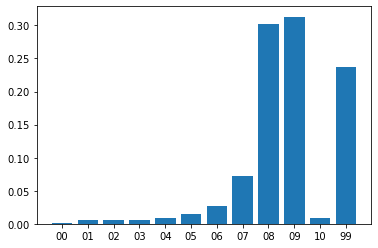

In [12]:
plt.bar(apgar1.index, apgar1)

In [71]:
apgar5 = df["FIVEMINUTEAPGAR"].value_counts().sort_index()/df.FIVEMINUTEAPGAR.count()

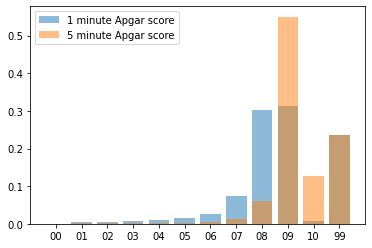

In [20]:
plt.bar(apgar1.index, apgar1, alpha=0.5, label="1 minute Apgar score")+plt.bar(apgar5.index, apgar5, alpha=0.5, label="5 minute Apgar score"); plt.legend()

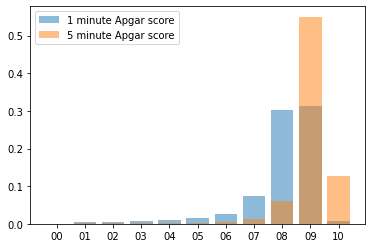

In [96]:
# From these two marginal distributions, we see that most babies perk up in the first few minutes of life:
# there are fewer 6,7,and 8 scores and more 9s and 10s.

# But we need not content ourselves with these marginal distributions; we have the full joint distribution.
# We can see what 1 minute scores change to in minute 5 if we wish.

# Let's get rid of the "99" missing data symbol

plt.bar(apgar1.index[:-1], apgar1[:-1], alpha=0.5, label="1 minute Apgar score")+plt.bar(apgar5.index[:-1], apgar5[:-1], alpha=0.5, label="5 minute Apgar score"); plt.legend()




In [25]:
df.groupby("ONEMINUTEAPGAR")


In [26]:
# Ok, this gives me some pandas function that I can't work with directly...
df.groupby("ONEMINUTEAPGAR").count()

,RESIDENTSTATUS,STATEOFRESIDENCE,POPULATIONSIZECITY,SEX,ATTENDANTTYPE,RACEOFFATHER,RACEOFMOTHER,RACEOFCHILD,RACEOFCHILDRECODE3,AGEOFMOTHER,...,PLURALITY,MONTH,DAY,DETAILGESTATIONAGE,MOTHERSEDUCATION,FATHERSEDUCATION,DETAILMARITALSTATUS,FIVEMINUTEAPGAR,HISPANIMOTHER,HISPANICFATHER
ONEMINUTEAPGAR,,,,,,,,,,,,,,,,,,,,,
00,2827,2827,2827,2827,2827,2827,2827,2827,2827,2827,...,2827,2827,2827,2827,2827,2827,2827,2827,2827,2827
01,19762,19762,19762,19762,19762,19762,19762,19762,19762,19762,...,19762,19762,19762,19762,19762,19762,19762,19762,19762,19762
02,19665,19665,19665,19665,19665,19665,19665,19665,19665,19665,...,19665,19665,19665,19665,19665,19665,19665,19665,19665,19665
03,25401,25401,25401,25401,25401,25401,25401,25401,25401,25401,...,25401,25401,25401,25401,25401,25401,25401,25401,25401,25401
04,36892,36892,36892,36892,36892,36892,36892,36892,36892,36892,...,36892,36892,36892,36892,36892,36892,36892,36892,36892,36892
05,57629,57629,57629,57629,57629,57629,57629,57629,57629,57629,...,57629,57629,57629,57629,57629,57629,57629,57629,57629,57629
06,102709,102709,102709,102709,102709,102709,102709,102709,102709,102709,...,102709,102709,102709,102709,102709,102709,102709,102709,102709,102709
07,284030,284030,284030,284030,284030,284030,284030,284030,284030,284030,...,284030,284030,284030,284030,284030,284030,284030,284030,284030,284030
08,1179788,1179788,1179788,1179788,1179788,1179788,1179788,1179788,1179788,1179788,...,1179788,1179788,1179788,1179788,1179788,1179788,1179788,1179788,1179788,1179788


In [28]:
# Oh, no, that's not right.  This counted the number of entries in all the columns.  I only want counts for one column
df.groupby("ONEMINUTEAPGAR").FIVEMINUTEAPGAR.count()

ONEMINUTEAPGAR
00       2827
01      19762
02      19665
03      25401
04      36892
05      57629
06     102709
07     284030
08    1179788
09    1225724
10      32464
99     926902
Name: FIVEMINUTEAPGAR, dtype: int64

In [12]:
# This is only one-dimensional.

# looks like I need to groupby both ONEMINUTEAPGAR and FIVEMINUTEAPGAR
apgarapgarhist = df.groupby(["ONEMINUTEAPGAR", "FIVEMINUTEAPGAR"]).FIVEMINUTEAPGAR.count()
apgarapgarhist.head()

ONEMINUTEAPGAR  FIVEMINUTEAPGAR
00              00                 1355
                01                  404
                02                  207
                03                  162
                04                  147
Name: FIVEMINUTEAPGAR, dtype: int64

In [13]:
# And this looks like the 2d histogram I seek.  

# To generate a heatmap, I'll convert to a numpy array 
apgarapgar= np.reshape(np.array(apgarapgarhist), (12,12))


In [14]:
# It is likely, but we should check, that ONEMINUTEAPGAR is indexed by row, FIVEMINUTEAPGAR by column
apgarapgar[0,1]  # should be 404 if row is ONEMINUTEAPGAR and column is FIVEMINUTEAPGAR

404

In [15]:
# chop off unknown apgar scores
apgarapgar = apgarapgar[0:11,0:11]

(Text(0, 0.5, 'One minute Apgar score'),
 Text(0.5, 0, 'Five minute Apgar score'))

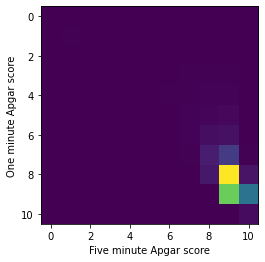

In [61]:
plt.imshow(apgarapgar); plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score")

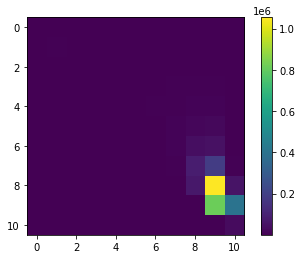

In [62]:
# There is almost no color in the bottom column, and there is color in the final row, consistent with
# the 1d histograms with <1% in apgar1 = 10 but ~14% in apgar5 = 10
# Need a colorbar
plt.imshow(apgarapgar); plt.colorbar()

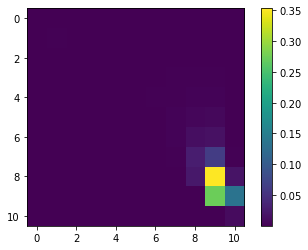

In [63]:
# Right.  Raw counts.  Divide by the total number of scores in this 11x11 submatrix..
plt.imshow(apgarapgar/apgarapgar.sum()); plt.colorbar()

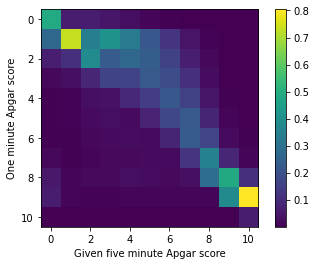

In [69]:
# and my, there isn't a lot of contrast here.  
#  Two reasonable options to enhance the contrast:  
#      Exaggerated colormap (log-scale colormap)
#      Divide by rows ; divide by columns to give the conditional distributions
#      of for example   AP5 | AP1 = 8  or AP1 | AP5 = 8
# Divide by column totals (apgar 5)  -- where did apgar 5 scores come from?
plt.imshow(apgarapgar/apgarapgar.sum(axis=0)); 
plt.ylabel("One minute Apgar score"), plt.xlabel("Given five minute Apgar score"); plt.colorbar()

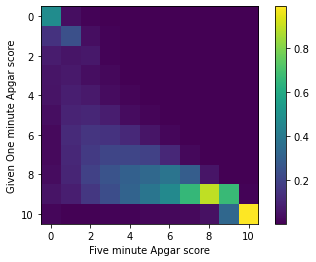

In [70]:
# divide by row totals -- where did apgar1 scores end up?
plt.imshow(apgarapgar.T/apgarapgar.T.sum(axis=0).T); 
plt.ylabel("Given One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()

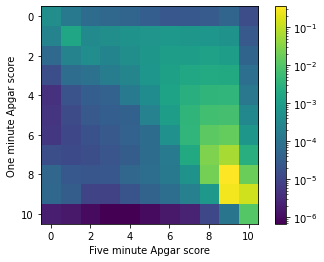

In [75]:
# And here is the exaggerated-color scale version
# Here matlab.colors.LogNorm  handles making the color scale logarithmic for us. 
from matplotlib.colors import LogNorm
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()

In [ ]:
# At least this one shows the truth that infants usually improve their scores between tests!

In [76]:
# We have to build a string like 19880621 and change format to get a good date column
df["DATE"] = pd.to_datetime("1988" + df["MONTH"]+ df["DAY"], errors="coerce")

In [94]:
maternalageapgarhist = df.groupby(["AGEOFMOTHER", "ONEMINUTEAPGAR"]).ONEMINUTEAPGAR.count()
maternalageapgarhist.head()

AGEOFMOTHER  ONEMINUTEAPGAR
10           02                1
             06                1
             07                3
             08                3
             09                5
Name: ONEMINUTEAPGAR, dtype: int64

In [77]:
# Birth rate modulation in time is cute, but infant deaths are a more important signal.
# The CDC published data bundles allowing us to examine "numerator" and "denominator"
# files that are cohort-linked all live births and those live births that died.

# This gives an accurately-knowable ratio that is *cough* extremely relevant for human health.

# But you have to parse two files.. the formats are slightly different and somewhat less detailed..
# and you need to query the numerator and the denominator for some properties.. 
# Hint:  babies born on the weekend are more likely to die than those on weekdays.
# and most of that signal is borne by cesarian births.


In [ ]:
# =======================================================================

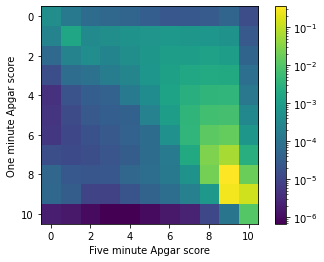

In [38]:
# Exaggerated-color scale version
#  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
#  plt.savefig() claims to support PNG, EPS, PDF, and SVG
#  It stands to reason they have different optional arguments (resolution, quality, metadata)
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()
plt.savefig("APGAR.png")

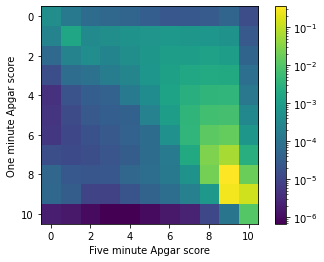

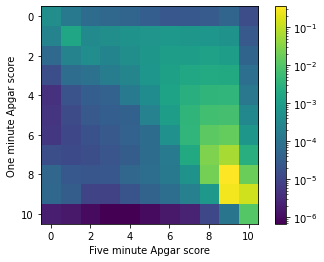

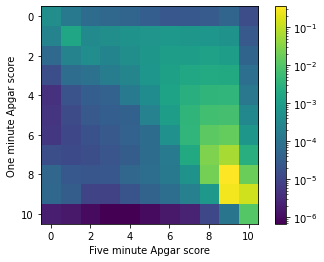

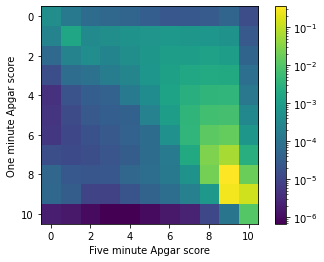

In [39]:
# Let us marginalize over output formats...
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()
plt.savefig("APGAR.jpg")
plt.figure()
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()
plt.savefig("APGAR.pdf")
plt.figure()
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()
plt.savefig("APGAR.eps")
plt.figure()
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()
plt.savefig("APGAR.svg")

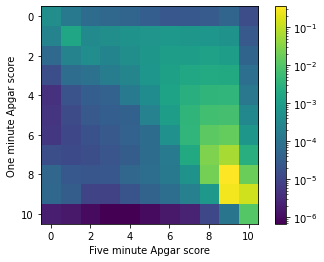

In [40]:
plt.figure()
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()
plt.savefig("APGAR300.png", dpi=300)

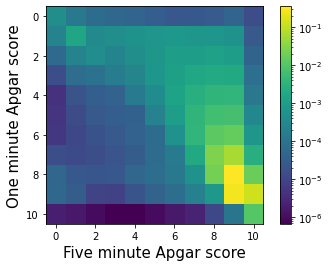

In [41]:
# And this seems to work, though at the cost of file size.   
# Make my fonts larger and I'll declare victory

plt.figure()
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=15), plt.xlabel("Five minute Apgar score", fontsize=15); plt.colorbar()
plt.savefig("APGAR.eps")

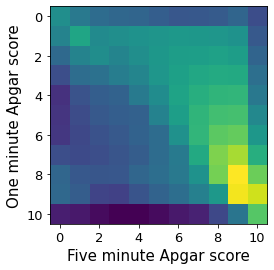

In [44]:
fig, ax = plt.subplots()
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=15), plt.xlabel("Five minute Apgar score", fontsize=15); 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
#plt.colorbar(fontsize=13)
plt.savefig("APGAR.eps")

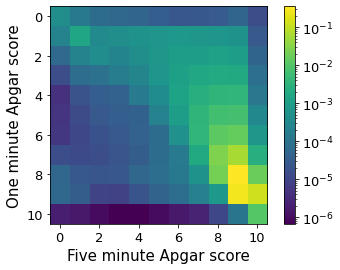

In [47]:
fig, ax = plt.subplots()
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=15), plt.xlabel("Five minute Apgar score", fontsize=15); 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
dir(cb)
cb.ax.tick_params(labelsize=13) 
plt.savefig("APGAR.eps")